In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Data Structures in Pandas
Data Structure refers to the specialized way of organizing, processing, and storing data to apply specific types of functionalities to them. 

Pandas has two main types of Data Structures based on their dependability –

Series: 1D labeled array
DataFrame: 2D labeled tabular structure

Loading Data into Pandas
from CSV, Excel, and SQL sources.

In [ ]:
df = pd.read_csv('bike_data/day.csv', index_col=0)

instant: record index
dteday : date
season : season (1:springer, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not (extracted from [Web Link])
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered
for further more information please go through the following link,
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [44]:
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons_label
instant,,,,,,,,,,,,,,,,
1,2011-01-01 00:00:00,1,0,1,0.0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring
2,2011-01-02 00:00:00,1,0,1,0.0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,spring
3,2011-01-03 00:00:00,1,0,1,0.0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,spring
4,2011-01-04 00:00:00,1,0,1,0.0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,spring
5,2011-01-05 00:00:00,1,0,1,0.0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,spring
6,2011-01-06 00:00:00,1,0,1,0.0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,spring
7,2011-01-07 00:00:00,1,0,1,0.0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,spring
8,2011-01-08 00:00:00,1,0,1,0.0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,spring
9,2011-01-09 00:00:00,1,0,1,0.0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,spring


In [ ]:
df.info(verbose=True)

Clean and preprocess data using pandas.

In [ ]:
df.loc[:, "dteday"] = pd.to_datetime(df.loc[:, "dteday"])

In [ ]:
df.info(verbose=True)

In [ ]:
df.isna()

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
df.isna().sum()

In [ ]:
df.shape

In [ ]:
df.dropna(how='any', axis=0)

In [ ]:
df.dropna(how='any', axis=1)

In [ ]:
df.dropna(subset=["holiday"])

In [ ]:
df.dropna(how="all")

‘any’ : If any NA values are present, drop that row or column.

‘all’ : If all values are NA, drop that row or column.

In [ ]:
df.fillna(0)

In [ ]:
df.fillna(0, inplace=True)

Data Exploration / Manipulating with Pandas

In [ ]:
df.loc[df["season"] == 2]

season : season (1:springer, 2:summer, 3:fall, 4:winter)

In [ ]:
df.loc[df["season"] == 2].loc[:, "temp"].mean()

In [ ]:
df.loc[df["season"] == 2].loc[:, "temp"].median()

In [ ]:
df.loc[df["season"] == 2].loc[:, "temp"].mode()

In [ ]:
df.groupby("season")["casual"].sum()

In [ ]:
df.groupby("season")["registered"].sum()

In [ ]:
df.loc[df["season"] == 2].loc[:, "registered"].sum()

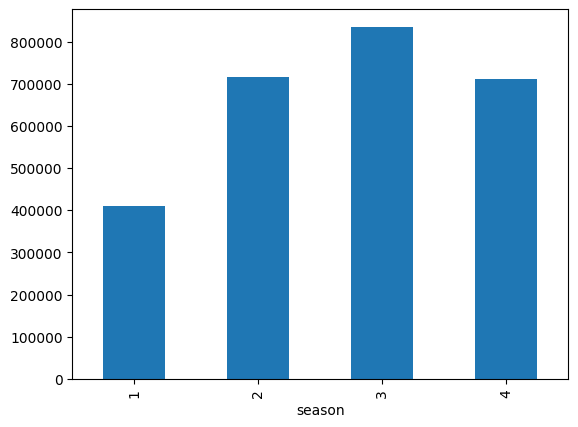

In [27]:
df.groupby("season")["registered"].sum().plot(kind="bar")
plt.show()

In [36]:
# season (1:springer, 2:summer, 3:fall, 4:winter)

seasons = {
     1:"spring", 2:"summer", 3:"fall", 4:"winter"
}

def set_season_label(x):
    return seasons[x]

df["seasons_label"] = df.loc[:,"season"].map(set_season_label)

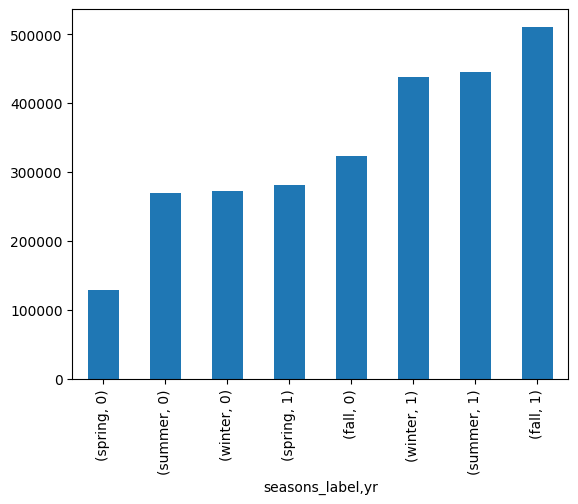

In [46]:
df.groupby(["seasons_label", "yr"])["registered"].sum().sort_values(ascending=True).plot(kind="bar")
plt.show()

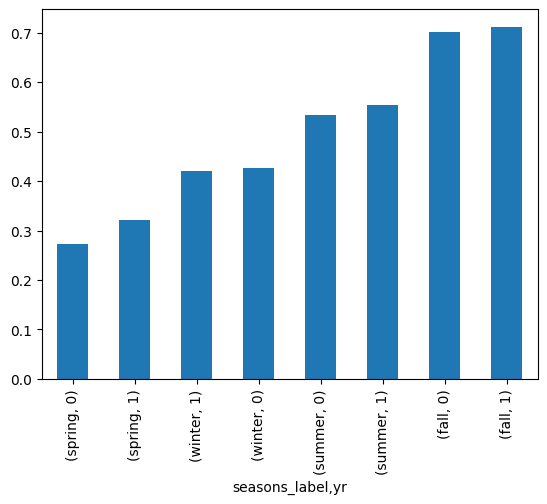

In [47]:
df.groupby(["seasons_label", "yr"])["temp"].mean().sort_values(ascending=True).plot(kind="bar")
plt.show()